In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('1.csv')
dataset.head(2)

,Mw,Distance,Depth,PGV*
0,6.0,207.102,8,0.919
1,6.0,187.826,8,0.404


In [3]:
dataset.describe(include='all')

,Mw,Distance,Depth,PGV*
count,9734.000000,9734.000000,9734.000000,9734.000000
mean,6.829577,233.684859,33.854120,4.691753
std,0.929284,138.516240,29.130407,8.584313
min,4.800000,8.445000,6.000000,0.076000
25%,6.200000,135.719750,12.000000,0.986000
50%,6.700000,202.581500,24.000000,1.988000
75%,7.000000,300.436000,44.000000,4.447500
max,9.000000,804.170000,146.000000,165.185000


In [4]:
x=dataset.iloc[:,0:3].values
y=dataset.iloc[:,3].values

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=0)

In [6]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(hidden_layer_sizes=(100,100,100,100),random_state=42)
mlp.fit(x_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 100, 100, 100), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=42, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [7]:
y_pred=mlp.predict(x_test)
y1_pred=mlp.predict(x_train)

In [8]:
from sklearn import metrics

In [9]:
print('Mean Absolute Error',metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error 2.0464355192537522


In [10]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 21.822335276669335


In [11]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 4.671438244980804


In [12]:
from sklearn.metrics import r2_score
print('r^2 test data: ', r2_score(y_test, y_pred))

r^2 test data:  0.5184031267815472


In [13]:
import matplotlib.pyplot as plt

TypeError: 'module' object is not callable

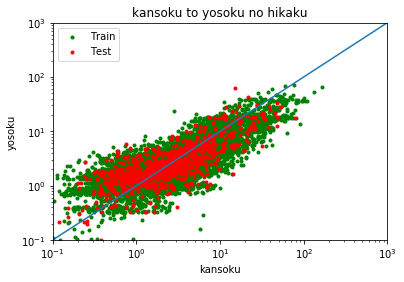

In [14]:
plt.title('kansoku to yosoku no hikaku')

plt.xlim(0.1,1000)
plt.ylim(0.1,1000)
plt.plot([0.1, 1000], [0.1, 1000])
plt.scatter(y_train,y1_pred,color='green',marker='.',label='Train')
plt.scatter(y_test,y_pred,color='red',marker='.',label='Test')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.xlabel('kansoku')
plt.ylabel('yosoku')
plt()

In [19]:
array=np.arange(501)

In [20]:
dataset1=pd.read_csv('D42M5.csv')
y1=mlp.predict(dataset1)
dataset2=pd.read_csv('D42M6.csv')
y2=mlp.predict(dataset2)
dataset3=pd.read_csv('D42M7.csv')
y3=mlp.predict(dataset3)

<function matplotlib.pyplot.show(*args, **kw)>

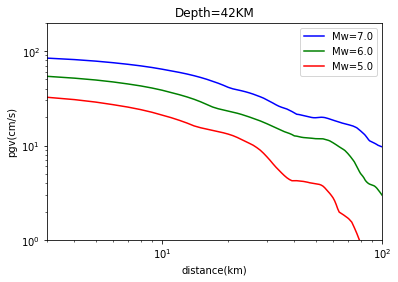

In [21]:
plt.title('Depth=42KM')

plt.plot(array,y3, color='blue', label='Mw=7.0')
plt.plot(array,y2, color='green',label='Mw=6.0')
plt.plot(array,y1, color='red',label='Mw=5.0')

plt.xlim(3,100)
plt.ylim(1,200)
plt.xlabel('distance(km)')
plt.ylabel('pgv(cm/s)')
plt.yscale('log')
plt.xscale('log')
plt.legend()

plt.show

In [22]:
dataset4=pd.read_csv('D8M5.csv')
y4=mlp.predict(dataset4)
dataset5=pd.read_csv('D8M6.csv')
y5=mlp.predict(dataset5)
dataset6=pd.read_csv('D8M7.csv')
y6=mlp.predict(dataset6)

<function matplotlib.pyplot.show(*args, **kw)>

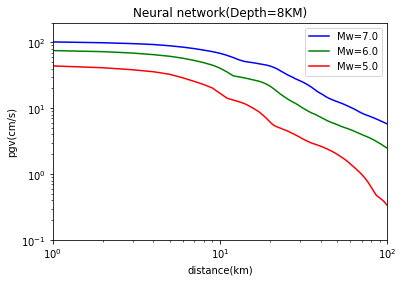

In [23]:
plt.title('Neural network(Depth=8KM)')

plt.plot(array,y6, color='blue', label='Mw=7.0')
plt.plot(array,y5, color='green',label='Mw=6.0')
plt.plot(array,y4, color='red',label='Mw=5.0')

plt.xlim(1,100)
plt.ylim(0.1,200)
plt.xlabel('distance(km)')
plt.ylabel('pgv(cm/s)')
plt.yscale('log')
plt.xscale('log')
plt.legend()

plt.show

# kumamoto0414

In [24]:
kumamoto0414=pd.read_csv('kumamoto.csv')
kumamoto0414.head()

,Mw,Distance,Depth
0,6.5,2.375,11
1,6.5,3.213,11
2,6.5,5.226,11
3,6.5,8.608,11
4,6.5,12.287,11


In [25]:
Ypgvkumamoto0414=mlp.predict(kumamoto0414)
Lkumamoto0414=kumamoto0414.iloc[:,1].values

In [26]:
Kpgvkumamoto0414=pd.read_csv('pgvkumamoto.csv')

<function matplotlib.pyplot.show(*args, **kw)>

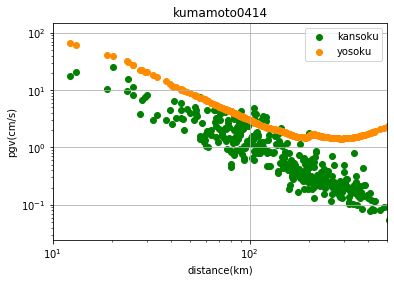

In [27]:
plt.title('kumamoto0414')
plt.scatter(Lkumamoto0414,Kpgvkumamoto0414, color='green', label='kansoku',alpha=1)
plt.scatter(Lkumamoto0414,Ypgvkumamoto0414, color='darkorange', label='yosoku',alpha=1)


plt.xlim(10,500)

plt.xlabel('distance(km)')
plt.ylabel('pgv(cm/s)')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.grid(True)
plt.show

In [28]:
print('Mean Absolute Error',metrics.mean_absolute_error(Kpgvkumamoto0414,Ypgvkumamoto0414))

Mean Absolute Error 3.0319104933538985


In [29]:
print('Mean Squared Error:', metrics.mean_squared_error(Kpgvkumamoto0414,Ypgvkumamoto0414))

Mean Squared Error: 46.02492363763701


In [30]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Kpgvkumamoto0414, Ypgvkumamoto0414)))

Root Mean Squared Error: 6.784167129253008


In [31]:
from sklearn.metrics import r2_score
print('r^2 test data: ', r2_score(Kpgvkumamoto0414,Ypgvkumamoto0414))

r^2 test data:  0.17459876441454936


# kumamoto0416

In [32]:
kumamoto0416=pd.read_csv('kumamoto416.csv')
kumamoto0416.head()

,Mw,Distance,Depth
0,7.3,2.069,12
1,7.3,3.880,12
2,7.3,5.653,12
3,7.3,5.931,12
4,7.3,9.474,12


In [33]:
Ypgvkumamoto0416=mlp.predict(kumamoto0416)

In [34]:
Lkumamoto0416=kumamoto0416.iloc[:,1].values

In [35]:
Kpgvkumamoto0416=pd.read_csv('pgvkumamoto416.csv')

<function matplotlib.pyplot.show(*args, **kw)>

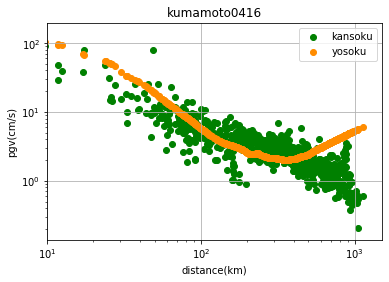

In [36]:
plt.title('kumamoto0416')
plt.scatter(Lkumamoto0416,Kpgvkumamoto0416, color='green', label='kansoku',alpha=1)
plt.scatter(Lkumamoto0416,Ypgvkumamoto0416, color='darkorange', label='yosoku',alpha=1)


plt.xlim(10,1500)

plt.xlabel('distance(km)')
plt.ylabel('pgv(cm/s)')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.grid(True)
plt.show

In [37]:
print('Mean Absolute Error',metrics.mean_absolute_error(Kpgvkumamoto0416,Ypgvkumamoto0416))
print('Mean Squared Error:', metrics.mean_squared_error(Kpgvkumamoto0416,Ypgvkumamoto0416))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Kpgvkumamoto0416, Ypgvkumamoto0416)))

Mean Absolute Error 2.996679669834763
Mean Squared Error: 49.066334748408224
Root Mean Squared Error: 7.004736593791963


# osaka0618

In [38]:
osaka0618=pd.read_csv('osaka0618.csv')
osaka0618.head()

,Mw,Distance,Depth
0,6.1,13.314,13
1,6.1,13.773,13
2,6.1,16.458,13
3,6.1,17.345,13
4,6.1,17.485,13


In [39]:
Ypgvosaka0618=mlp.predict(osaka0618)

In [40]:
Losaka0618=osaka0618.iloc[:,1].values

In [41]:
Kpgvosaka0618=pd.read_csv('pgvosaka0618.csv')

<function matplotlib.pyplot.show(*args, **kw)>

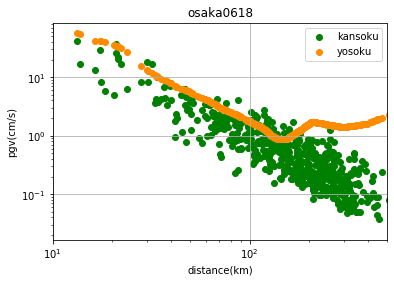

In [42]:
plt.title('osaka0618')
plt.scatter(Losaka0618,Kpgvosaka0618, color='green', label='kansoku',alpha=1)
plt.scatter(Losaka0618,Ypgvosaka0618, color='darkorange', label='yosoku',alpha=1)


plt.xlim(10,500)

plt.xlabel('distance(km)')
plt.ylabel('pgv(cm/s)')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.grid(True)
plt.show

In [43]:
print('Mean Absolute Error',metrics.mean_absolute_error(Kpgvosaka0618,Ypgvosaka0618))
print('Mean Squared Error:', metrics.mean_squared_error(Kpgvosaka0618,Ypgvosaka0618))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Kpgvosaka0618, Ypgvosaka0618)))

Mean Absolute Error 1.6959718992784847
Mean Squared Error: 15.254963398931798
Root Mean Squared Error: 3.9057602843661305


# hokkaido0906

In [44]:
hokkaido0906=pd.read_csv('hokkaido0906.csv')
hokkaido0906.head()

,Mw,Distance,Depth
0,6.7,16.719,35
1,6.7,18.840,35
2,6.7,20.601,35
3,6.7,20.881,35
4,6.7,21.093,35


In [45]:
Ypgvhokkaido0906=mlp.predict(hokkaido0906)

In [46]:
Lhokkaido0906=hokkaido0906.iloc[:,1].values

In [47]:
Kpgvhokkaido0906=pd.read_csv('pgvhokkaido0906.csv')

<function matplotlib.pyplot.show(*args, **kw)>

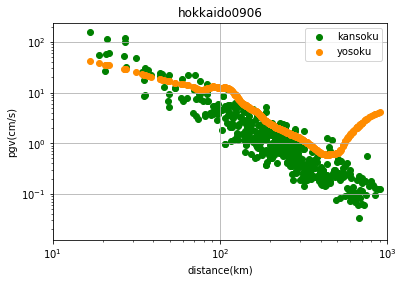

In [48]:
plt.title('hokkaido0906')
plt.scatter(Lhokkaido0906,Kpgvhokkaido0906, color='green', label='kansoku',alpha=1)
plt.scatter(Lhokkaido0906,Ypgvhokkaido0906, color='darkorange', label='yosoku',alpha=1)


plt.xlim(10,1000)

plt.xlabel('distance(km)')
plt.ylabel('pgv(cm/s)')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.grid(True)
plt.show

In [49]:
print('Mean Absolute Error',metrics.mean_absolute_error(Kpgvhokkaido0906,Ypgvhokkaido0906))
print('Mean Squared Error:', metrics.mean_squared_error(Kpgvhokkaido0906,Ypgvhokkaido0906))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Kpgvhokkaido0906, Ypgvhokkaido0906)))

Mean Absolute Error 3.3931648425860472
Mean Squared Error: 87.72881878979227
Root Mean Squared Error: 9.366366360002809


# テスト100以下

# hokkaido

In [50]:
hokkaido100=pd.read_csv('h100.csv')

In [51]:
Ypgvhokkaido100=mlp.predict(hokkaido100)

In [52]:
Lhokkaido100=hokkaido100.iloc[:,1].values

In [53]:
Kpgvhokkaido100=pd.read_csv('ph100.csv')

<function matplotlib.pyplot.show(*args, **kw)>

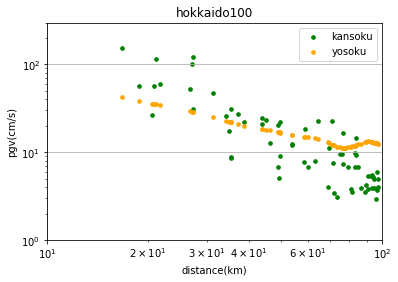

In [55]:
plt.title('hokkaido100')
plt.scatter(Lhokkaido100,Kpgvhokkaido100,s=13, color='green', label='kansoku',alpha=1)
plt.scatter(Lhokkaido100,Ypgvhokkaido100,s=13, color='orange', label='yosoku',alpha=1)

plt.xlim(10,100)
plt.ylim(1,300)

plt.xlabel('distance(km)')
plt.ylabel('pgv(cm/s)')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.grid(True)
plt.show

In [56]:
print('Mean Absolute Error',metrics.mean_absolute_error(Kpgvhokkaido100,Ypgvhokkaido100))
print('Mean Squared Error:', metrics.mean_squared_error(Kpgvhokkaido100,Ypgvhokkaido100))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Kpgvhokkaido100,Ypgvhokkaido100)))

Mean Absolute Error 12.430680350728197
Mean Squared Error: 555.5608575338796
Root Mean Squared Error: 23.570338511228037


# osaka

In [59]:
osaka100=pd.read_csv('o100.csv')

In [60]:
Ypgvosaka100=mlp.predict(osaka100)

In [61]:
Losaka100=osaka100.iloc[:,1].values

In [62]:
Kpgvosaka100=pd.read_csv('po100.csv')

<function matplotlib.pyplot.show(*args, **kw)>

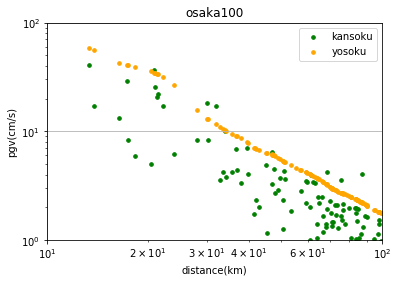

In [65]:
plt.title('osaka100')
plt.scatter(Losaka100,Kpgvosaka100,s=13, color='green', label='kansoku',alpha=1)
plt.scatter(Losaka100,Ypgvosaka100,s=13, color='orange', label='yosoku',alpha=1)

plt.xlim(10,100)
plt.ylim(1,100)

plt.xlabel('distance(km)')
plt.ylabel('pgv(cm/s)')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.grid(True)
plt.show

In [64]:
print('Mean Absolute Error',metrics.mean_absolute_error(Kpgvosaka100,Ypgvosaka100))
print('Mean Squared Error:', metrics.mean_squared_error(Kpgvosaka100,Ypgvosaka100))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Kpgvosaka100,Ypgvosaka100)))

Mean Absolute Error 4.044321723784055
Mean Squared Error: 63.70960301104061
Root Mean Squared Error: 7.981829552868228


# kumamoto0416

In [71]:
kh100=pd.read_csv('kh100.csv')

In [72]:
Ypgvkh100=mlp.predict(kh100)

In [73]:
Lkh100=kh100.iloc[:,1].values

In [74]:
Kpgvkh100=pd.read_csv('pkh100.csv')

<function matplotlib.pyplot.show(*args, **kw)>

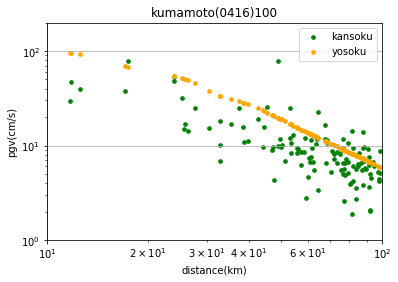

In [84]:
plt.title('kumamoto(0416)100')
plt.scatter(Lkh100,Kpgvkh100,s=13, color='green', label='kansoku',alpha=1)
plt.scatter(Lkh100,Ypgvkh100,s=13, color='orange', label='yosoku',alpha=1)

plt.xlim(10,100)
plt.ylim(1,200)

plt.xlabel('distance(km)')
plt.ylabel('pgv(cm/s)')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.grid(True)
plt.show

In [79]:
print('Mean Absolute Error',metrics.mean_absolute_error(Kpgvkh100,Ypgvkh100))
print('Mean Squared Error:', metrics.mean_squared_error(Kpgvkh100,Ypgvkh100))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Kpgvkh100,Ypgvkh100)))

Mean Absolute Error 9.254420001665043
Mean Squared Error: 249.43201457090316
Root Mean Squared Error: 15.793416811155943


# kumamoto0414

In [80]:
kz100=pd.read_csv('kz100.csv')

In [81]:
Ypgvkz100=mlp.predict(kz100)

In [82]:
Lkz100=kz100.iloc[:,1].values

In [83]:
Kpgvkz100=pd.read_csv('pkz100.csv')

<function matplotlib.pyplot.show(*args, **kw)>

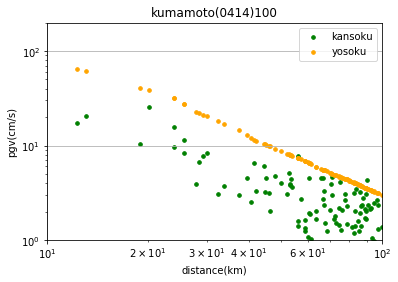

In [85]:
plt.title('kumamoto(0414)100')
plt.scatter(Lkz100,Kpgvkz100,s=13, color='green', label='kansoku',alpha=1)
plt.scatter(Lkz100,Ypgvkz100,s=13, color='orange', label='yosoku',alpha=1)

plt.xlim(10,100)
plt.ylim(1,200)

plt.xlabel('distance(km)')
plt.ylabel('pgv(cm/s)')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.grid(True)
plt.show

In [86]:
print('Mean Absolute Error',metrics.mean_absolute_error(Kpgvkz100,Ypgvkz100))
print('Mean Squared Error:', metrics.mean_squared_error(Kpgvkz100,Ypgvkz100))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Kpgvkz100,Ypgvkz100)))

Mean Absolute Error 6.330815098707226
Mean Squared Error: 130.0407185445954
Root Mean Squared Error: 11.40353973749359
